# Exploration of fast5 file data type by *h5py* and *ont-fast5-api* python libraries

**Author:** Adriano Fonzino, Ph.D.

**Oxford NanoPore Techology** (**ONT**) sequencing stores data as a specialized file format named **fast5** that is based on the **HDF5** format.
**HDF5** format is designed to store and organize efficently, a large amounts of data. Here, firstly, by the use of the **h5py** generic library for HDF5 files are explored **fast5** file produced by ONT sequencing experiments.

In [1]:
import h5py
import ont_fast5_api
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import os
from tqdm import tqdm

In [2]:
# example file from non modified curlcake dataset from EpiNano paper (Liu et al., 2019 - Nat.Comm.)
# BioSample: SAMN10640340; SRA: SRS4184285; GEO: GSM3528749
# source name	In-vitro transcript Capped/PolyA+
# construct	Curlcake construct Non-modified
url = r"C:\Users\adria\Desktop\EpiNanoDataset\Curlcake_constructs_unmodified_Replicate_1\fast5\1204670-2.fast5\GXB01170_20180726_FAH85615_GA10000_sequencing_run_RNAAB089716_65817_read_123_ch_483_strand.fast5"
f = h5py.File(url, "r")
f

<HDF5 file "GXB01170_20180726_FAH85615_GA10000_sequencing_run_RNAAB089716_65817_read_123_ch_483_strand.fast5" (mode r)>

In [3]:
# get keys of HDF5/fast5 file
f.keys()

<KeysViewHDF5 ['Analyses', 'PreviousReadInfo', 'Raw', 'UniqueGlobalKey']>

In [4]:
# get integer transformed raw signals of the read
read = np.array(list(f["Raw"]["Reads"]["Read_123"]["Signal"]))

In [5]:
read.shape

(150308,)

In [6]:
read

array([491, 481, 463, ..., 556, 595, 876], dtype=int16)

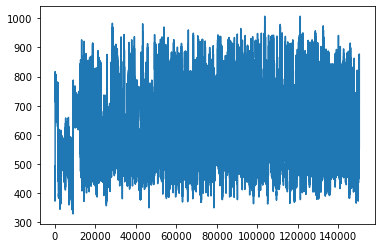

In [7]:
# plotting integer raw read signal
plt.plot(read)
plt.show()

In [8]:
# getting fastq file generated by basecaller by the use of h5py generic library
f["Analyses"]["Basecall_1D_000"]["BaseCalled_template"]["Fastq"].value

b'@46b610c1-7dc1-44e1-9705-88c679cd2614_Basecall_1D_template GXB01170_20180726_FAH85615_GA10000_sequencing_run_RNAAB089716_65817_read_123_ch_483_strand\nUCGACUUCGCCCUCGAAGCGAUCCACCCCGCAUCCUAAACACCAGUCAAAACUCCUGGGACCGCGCACACCCACUGAGACAGAGCGACGCUCCCUCGCCGUGGUGUUUUUUCAGCAGUAGCGCUUUCUGUUUCCAUCGGGCGAACUGGAGAAUGACUGUCACUACUCUGGCUGGCAACGAAGGGCCAACCUGGCGUGGUCUGAUUAGCACUGGUUUAGGUUUAUAAUGAUGUAUUUCGAUGCGUUCGAAAACAGCGGUUUCAACUGGCCAUUAGCUACCUACAUGCUCCCAUGACUGAUACACGGUUGGGUUACAAAUGAUCCGACAUGGAUGCUUCCCUCACUGGUGGGGAAGUCUAGAUUCAUCUGGGACAUCGACAAGUCCUCCACGUUAUGCGAACUCCUAUGACUACCCUUUCCCAAAGGGCUAAACAAGACAUUCCCGUACGCGAGUAGAGGAGCCUUAACCGCAGUGGGAUGCUAGGAUCGGCUAAGGGUUUCCUAAUAGGCGGGGGAGUUUUCAAUGGCUUACUGAACUCCUGCGCAAGUUGUGGCGAUCCUGACGCUGCGAUAAAUUUCAGGUUCGAACGCUAUGGAGUCCAGAGCUGCUGCAGGCGAAUUCUGCAGUUGGAAACCAUGGAUAAAUUGGCGCCGUCAAGGCUACACUUAAUACGCCCGCGCUCCCGGCCUCGAGGAGUUUGCCGCGUGAUCCAGUGAAUCUUCCCCAUCGACAUGAAUUAGGCCUUGGUGGCGCGCGGUGCACCGAGAAUCAAACUACUGCCACAACGGCAAGGUUUUCUGGAGCAUAGCAGAUUGCACAACGCCACAUACUGGUGAUUGUCCCAGCG

## Oxford NanoPore Technology Python library *ont-fast5-api*
Here there is the same exploration of **fast5** file by the use of **ont_fast5_api** Python library, that is a simple interface to HDF5 files of the Oxford Nanopore .fast5 file format. <br>
It provides: 
- Concrete implementation of the fast5 file schema using the generic h5py library
- Plain-english-named methods to interact with and reflect the fast5 file schema
- Tools to convert between multi_read and single_read formats
- Tools to compress/decompress raw data in files

In [9]:
from ont_fast5_api.fast5_interface import get_fast5_file

In [10]:
# printing read from the same fast5 example file from non-modified curlcake dataset of EpiNano paper (Liu et al., 2019)
def print_all_raw_data():
    fast5_filepath = url # This can be a single- or multi-read file
    with get_fast5_file(fast5_filepath, mode="r") as f5:
        for read in f5.get_reads():
            raw_data = read.get_raw_data()
            print(read.read_id, raw_data)

In [11]:
print_all_raw_data()

46b610c1-7dc1-44e1-9705-88c679cd2614 [491 481 463 ... 556 595 876]


In [12]:
# get the File Object
f5 = get_fast5_file(url, mode="r")
f5

In [13]:
# get filename
f5.filename

'C:\\Users\\adria\\Desktop\\EpiNanoDataset\\Curlcake_constructs_unmodified_Replicate_1\\fast5\\1204670-2.fast5\\GXB01170_20180726_FAH85615_GA10000_sequencing_run_RNAAB089716_65817_read_123_ch_483_strand.fast5'

In [14]:
# get list of reads (if it is a multi-fast5 file. This isn't the case, we are dealing with a single-fast5 file)
reads = []
for read in f5.get_reads():
    reads.append(read)
len(reads)

1

In [15]:
# retieve the unique element in the list
read_f5 = reads[0]
read_f5

In [16]:
# get read id - method 1
read_f5.get_read_ids()

['46b610c1-7dc1-44e1-9705-88c679cd2614']

In [17]:
# get read id - method 2
read_f5.get_read_id()

'46b610c1-7dc1-44e1-9705-88c679cd2614'

In [18]:
# get read id - method 3
read_f5.read_id

'46b610c1-7dc1-44e1-9705-88c679cd2614'

In [19]:
# get channel's info
read_f5.get_channel_info()

{'channel_number': 483,
 'digitisation': 8192.0,
 'offset': 5.0,
 'range': 1131.1875,
 'sampling_rate': 3012.0}

In the above cell we've got channel's info. Here are stored informations like digitisation, offset and range. These are used by the software to transform the signal of the current intestiy values recorded during the experiment into integer in order to save space storage. <br>

In [20]:
# get context tags
read_f5.get_context_tags()

{'experiment_duration_set': '2880',
 'experiment_type': 'rna',
 'fast5_output_fastq_in_hdf': '1',
 'fast5_raw': '1',
 'fast5_reads_per_folder': '4000',
 'fastq_enabled': '1',
 'fastq_reads_per_file': '4000',
 'filename': 'gxb01170_20180726_fah85615_ga10000_sequencing_run_rnaab089716_65817',
 'flowcell_type': 'flo-min106',
 'kit_classification': 'none',
 'local_basecalling': '1',
 'local_bc_comp_model': '',
 'local_bc_temp_model': 'template_r9.4.1_70bps_5mer_rna_raw.jsn',
 'sample_frequency': '3012',
 'sequencing_kit': 'sqk-rna001',
 'user_filename_input': 'rnaab089716'}

In [21]:
# get tracking id info
read_f5.get_tracking_id()

{'asic_id': '4246004002',
 'asic_id_eeprom': '4549593',
 'asic_temp': '22.032652',
 'asic_version': 'IA02C',
 'auto_update': '0',
 'auto_update_source': 'https://mirror.oxfordnanoportal.com/software/MinKNOW/',
 'bream_is_standard': '0',
 'device_id': 'GA10000',
 'device_type': 'gridion',
 'exp_script_name': '08a1e82e5c89bc477ac5756d25a86a88e680fba6-9ac881a19342ff7f47b5c217536b3a50e6b51e07',
 'exp_script_purpose': 'sequencing_run',
 'exp_start_time': '2018-07-26T03:02:51Z',
 'flow_cell_id': 'FAH85615',
 'heatsink_temp': '33.898438',
 'hostname': 'GXB01170',
 'installation_type': 'nc',
 'local_firmware_file': '1',
 'operating_system': 'ubuntu 16.04',
 'protocol_run_id': '0c752d44-facb-4c65-b125-2cae69597db6',
 'protocols_version': '0.0.0.0',
 'run_id': '0ac8beba0653c70e1d4b40b40a6c9884702d07b5',
 'sample_id': 'RNAAB089716',
 'usb_config': 'firm_1.2.3_ware#rbt_4.5.6_rbt#ctrl#USB3',
 'version': '1.14.1'}

In [22]:
# get raw data of read
read_f5.get_raw_data()

array([491, 481, 463, ..., 556, 595, 876], dtype=int16)

In [23]:
# get shape of raw data of read
read_f5.get_raw_data().shape

(150308,)

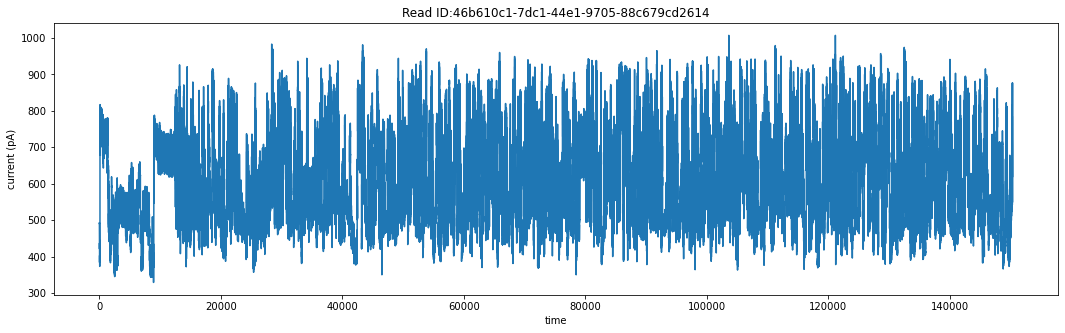

In [24]:
# plot whole read raw signal
plt.figure(figsize=(18,5))
plt.plot(read_f5.get_raw_data())
plt.title("Read ID:"+read_f5.read_id)
plt.xlabel("time")
plt.ylabel("current (pA)")
plt.show()

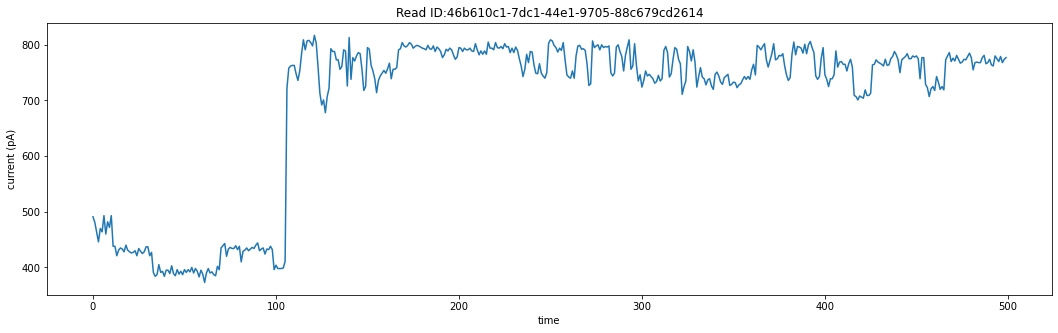

In [25]:
# plot first part of the read raw signal focusing on ONT adpter and first part of the Poly-A tail
plt.figure(figsize=(18,5))
plt.plot(np.arange(0, read_f5.get_raw_data()[0:500].shape[0]), read_f5.get_raw_data()[0:500])
plt.title("Read ID:" + read_f5.read_id)
plt.xlabel("time")
plt.ylabel("current (pA)")
plt.show()

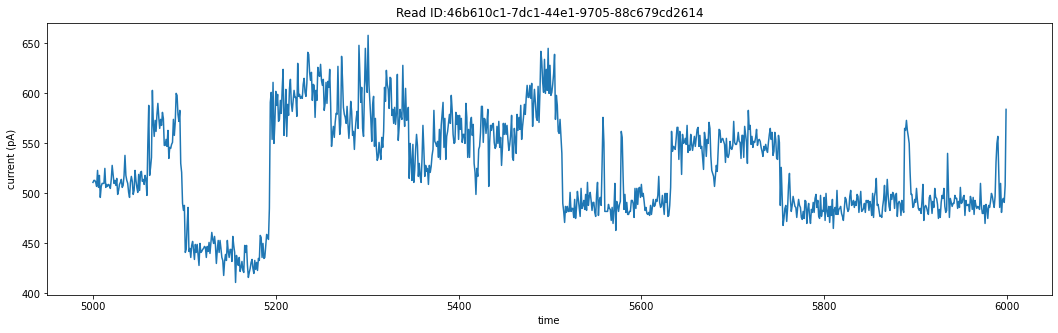

In [26]:
# plot a small part of the read raw signal focusing on inner sequence to show the classic "squiggle" signal.
plt.figure(figsize=(18,5))
plt.plot(np.arange(5000, 5000+read_f5.get_raw_data()[5000:6000].shape[0]), read_f5.get_raw_data()[5000:6000])
plt.title("Read ID:" + read_f5.read_id)
plt.xlabel("time")
plt.ylabel("current (pA)")
plt.show()

In [27]:
# load a second read
url_2 = r"C:\Users\adria\Desktop\EpiNanoDataset\Curlcake_constructs_unmodified_Replicate_1\fast5\1204670-2.fast5\GXB01170_20180726_FAH85615_GA10000_sequencing_run_RNAAB089716_65817_read_158_ch_156_strand.fast5"
f5_2 = get_fast5_file(url_2, mode="r")
f5_2

In [28]:
f5_2.filename

'C:\\Users\\adria\\Desktop\\EpiNanoDataset\\Curlcake_constructs_unmodified_Replicate_1\\fast5\\1204670-2.fast5\\GXB01170_20180726_FAH85615_GA10000_sequencing_run_RNAAB089716_65817_read_158_ch_156_strand.fast5'

In [29]:
# get list of reads (if it is a multi-fast5 file. This isn't the case, we are dealing with a single-fast5 file)
reads_2 = []
for read in f5_2.get_reads():
    reads_2.append(read)
len(reads_2)

1

In [30]:
read_f5_2 = reads_2[0]
read_f5_2

In [31]:
read_f5_2.filename

'C:\\Users\\adria\\Desktop\\EpiNanoDataset\\Curlcake_constructs_unmodified_Replicate_1\\fast5\\1204670-2.fast5\\GXB01170_20180726_FAH85615_GA10000_sequencing_run_RNAAB089716_65817_read_158_ch_156_strand.fast5'

In [32]:
read_f5_2.read_id

'be31faed-bd5a-42e3-8b81-9df693f13c6c'

In [33]:
# get channel info
read_f5_2.get_channel_info()

{'channel_number': 156,
 'digitisation': 8192.0,
 'offset': 11.0,
 'range': 1131.1875,
 'sampling_rate': 3012.0}

In [34]:
# get context tags
read_f5.get_context_tags()

{'experiment_duration_set': '2880',
 'experiment_type': 'rna',
 'fast5_output_fastq_in_hdf': '1',
 'fast5_raw': '1',
 'fast5_reads_per_folder': '4000',
 'fastq_enabled': '1',
 'fastq_reads_per_file': '4000',
 'filename': 'gxb01170_20180726_fah85615_ga10000_sequencing_run_rnaab089716_65817',
 'flowcell_type': 'flo-min106',
 'kit_classification': 'none',
 'local_basecalling': '1',
 'local_bc_comp_model': '',
 'local_bc_temp_model': 'template_r9.4.1_70bps_5mer_rna_raw.jsn',
 'sample_frequency': '3012',
 'sequencing_kit': 'sqk-rna001',
 'user_filename_input': 'rnaab089716'}

In [35]:
read_f5_2.get_tracking_id()

{'asic_id': '4246004002',
 'asic_id_eeprom': '4549593',
 'asic_temp': '22.032652',
 'asic_version': 'IA02C',
 'auto_update': '0',
 'auto_update_source': 'https://mirror.oxfordnanoportal.com/software/MinKNOW/',
 'bream_is_standard': '0',
 'device_id': 'GA10000',
 'device_type': 'gridion',
 'exp_script_name': '08a1e82e5c89bc477ac5756d25a86a88e680fba6-9ac881a19342ff7f47b5c217536b3a50e6b51e07',
 'exp_script_purpose': 'sequencing_run',
 'exp_start_time': '2018-07-26T03:02:51Z',
 'flow_cell_id': 'FAH85615',
 'heatsink_temp': '33.898438',
 'hostname': 'GXB01170',
 'installation_type': 'nc',
 'local_firmware_file': '1',
 'operating_system': 'ubuntu 16.04',
 'protocol_run_id': '0c752d44-facb-4c65-b125-2cae69597db6',
 'protocols_version': '0.0.0.0',
 'run_id': '0ac8beba0653c70e1d4b40b40a6c9884702d07b5',
 'sample_id': 'RNAAB089716',
 'usb_config': 'firm_1.2.3_ware#rbt_4.5.6_rbt#ctrl#USB3',
 'version': '1.14.1'}

In [36]:
# get shape of raw data of read
read_f5_2.get_raw_data().shape

(11213,)

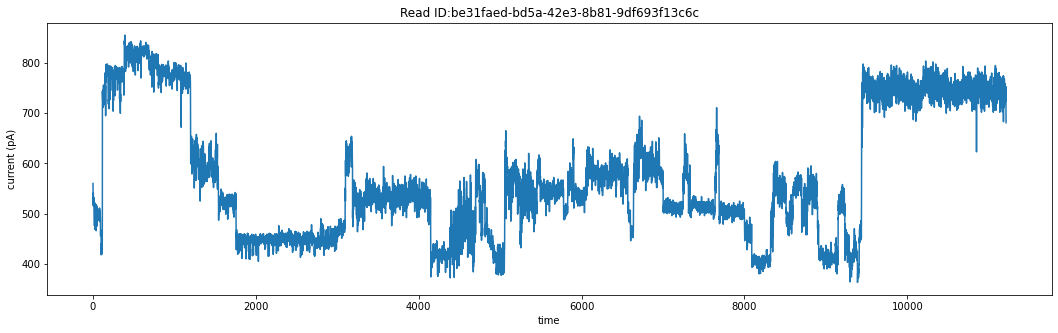

In [37]:
# plot whole read raw signal
plt.figure(figsize=(18,5))
plt.plot(read_f5_2.get_raw_data())
plt.title("Read ID:"+read_f5_2.read_id)
plt.xlabel("time")
plt.ylabel("current (pA)")
plt.show()

In [38]:
# get all the lenghts of the reads in the folder "1204670-2.fast5"
folder_url = r"C:\Users\adria\Desktop\EpiNanoDataset\Curlcake_constructs_unmodified_Replicate_1\fast5\1204670-2.fast5"
lenght_raw_reads_folder = []

with tqdm(total=len(os.listdir(folder_url))) as pbar:
    for i in os.listdir(folder_url):
        f5 = get_fast5_file(os.path.join(folder_url, i), mode='r')
        reads = []
        for read in f5.get_reads():
            reads.append(read)
        read_f5 = reads[0].get_raw_data()
        lenght_raw_reads_folder.append(read_f5.shape[0])
        pbar.update(1)

100%|██████████| 7999/7999 [02:02<00:00, 65.35it/s]


In [39]:
len(lenght_raw_reads_folder)

7999

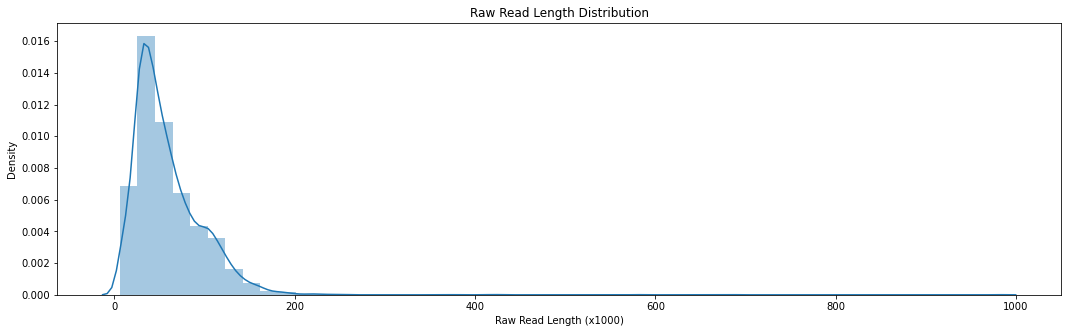

In [40]:
plt.figure(figsize=(18,5))
sn.distplot(np.array(lenght_raw_reads_folder)/1000).set_title("Raw Read Length Distribution")
plt.xlabel("Raw Read Length (x1000)")
plt.show()

## Extracting Events from HDF5 file (fast5) by h5py library
After the basecalling, the resulting fast5 files contain information about the events related to the pore and its DNA/RNA context within it. Indeed, the strand  Indeed it is known that the strand is threaded through the pore using a biological process with a strong stochastic rate. Since raw samples are measured at a fixed time-rate, the number of raw samples corresponding to a specific DNA/RNA context is a stochastic measument. So, the process of event detection takes as input the sequence of raw samples, and it produces a sequence of events that theorically correspond to exactly one DNA/RNA context. To note, the process is sometimes noisy, so some DNA/RNA contexts can correspond to either 0 events (i.e., they are missed) or 2 or more events (i.e., they are over-separated).

In [41]:
f.file

<HDF5 file "GXB01170_20180726_FAH85615_GA10000_sequencing_run_RNAAB089716_65817_read_123_ch_483_strand.fast5" (mode r)>

In [42]:
f["Raw"]["Reads"]["Read_123"]["Signal"].shape[0]

150308

In [43]:
for i in f.items():
    print(i)

('Analyses', <HDF5 group "/Analyses" (3 members)>)
('PreviousReadInfo', <HDF5 group "/PreviousReadInfo" (0 members)>)
('Raw', <HDF5 group "/Raw" (1 members)>)
('UniqueGlobalKey', <HDF5 group "/UniqueGlobalKey" (3 members)>)


In [44]:
f.keys()

<KeysViewHDF5 ['Analyses', 'PreviousReadInfo', 'Raw', 'UniqueGlobalKey']>

In [45]:
f["Raw"]["Reads"]["Read_123"]["Signal"]

<HDF5 dataset "Signal": shape (150308,), type "<i2">

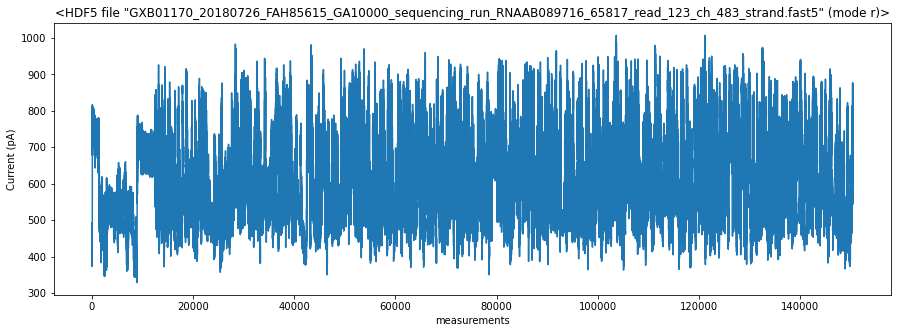

In [46]:
plt.figure(figsize=(15,5))
plt.plot(f["Raw"]["Reads"]["Read_123"]["Signal"])
plt.title(f.file)
plt.xlabel("measurements")
plt.ylabel("Current (pA)")
plt.show()

In [47]:
f["Analyses"].keys()

<KeysViewHDF5 ['Basecall_1D_000', 'Calibration_Strand_Detection_000', 'Segmentation_000']>

In [48]:
f["Analyses"]['Basecall_1D_000']['BaseCalled_template']["Events"].shape[0]

10020

In [49]:
# extract first event
f["Analyses"]['Basecall_1D_000']['BaseCalled_template']["Events"][0].dtype

dtype([('mean', '<f4'), ('stdv', '<f4'), ('start', '<u8'), ('length', '<u8'), ('model_state', 'S5'), ('move', '<i4'), ('weights', '<f4'), ('p_model_state', '<f4'), ('mp_state', 'S5'), ('p_mp_state', '<f4'), ('p_A', '<f4'), ('p_C', '<f4'), ('p_G', '<f4'), ('p_T', '<f4')])

In [50]:
f_events = pd.DataFrame(f["Analyses"]['Basecall_1D_000']['BaseCalled_template']["Events"][:])
f_events

mean       stdv   start  length model_state  move   weights  \
0      64.605095  12.144940       0      15    b'AACCT'     1  0.748622   
1      60.085136   2.560091      15      15    b'AACCT'     0  0.908190   
2      55.841343   8.457712      30      15    b'AACCT'     0  0.013593   
3      54.847130   2.525095      45      15    b'ACCTA'     1  0.838293   
4      56.577789  11.800307      60      15    b'ACCTA'     0  0.042088   
...          ...        ...     ...     ...         ...   ...       ...   
10015  83.504242  24.421406  150225      15    b'TTCAG'     0  0.014144   
10016  84.139442  38.884758  150240      15    b'TTCAG'     0  0.253795   
10017  88.125473  44.563927  150255      15    b'TTCAG'     0  0.333405   
10018  87.177299  34.431324  150270      15    b'TTCAG'     0  0.751098   
10019  80.125793  18.049980  150285      15    b'CAGCT'     2  0.988128   

       p_model_state  mp_state  p_mp_state       p_A       p_C       p_G  \
0           0.413031  b'AACCT'    0.413031  0.195043  0.765872  0.010918   
1           0.535174  b'AACCT'    0.535174  0.062838  0.779617  0.003243   
2           0.527856  b'AACCT'    0.527856  0.063423  0.773989  0.003239   
3           0.057589  b'ACCTC'    0.259444  0.060532  0.854696  0.002779   
4           0.055419  b'ACCTC'    0.250102  0.059249  0.841770  0.002805   
...              ...       ...         ...       ...       ...       ...   
10015       0.312614  b'TTCAG'    0.312614  0.094127  0.515472  0.342302   
10016       0.262214  b'TTCAG'    0.262214  0.093621  0.429274  0.408473   
10017       0.215021  b'TTCAG'    0.215021  0.101546  0.346455  0.477707   
10018       0.075710  b'CAGTG'    0.235884  0.161775  0.135740  0.636227   
10019       0.120139  b'CAGCT'    0.120139  0.064834  0.015959  0.592300   

            p_T  
0      0.028169  
1      0.154304  
2      0.159350  
3      0.081994  
4      0.096177  
...         ...  
10015  0.048100  
10016  0.068634  
10017  0.074292  
10018  0.066258  
10019  0.326907  

[10020 rows x 14 columns]

In [51]:
f_events.describe()

mean          stdv          start   length          move  \
count  10020.000000  10020.000000   10020.000000  10020.0  10020.000000   
mean      84.142250     16.972666   75142.500000     15.0      0.284731   
std       15.833632     12.939081   43390.037739      0.0      0.577609   
min       48.357159      2.018112       0.000000     15.0      0.000000   
25%       71.095070      7.948234   37571.250000     15.0      0.000000   
50%       81.423775     12.807158   75142.500000     15.0      0.000000   
75%       96.974382     21.929845  112713.750000     15.0      0.000000   
max      131.760147    107.143570  150285.000000     15.0      2.000000   

            weights  p_model_state    p_mp_state           p_A           p_C  \
count  10020.000000   10020.000000  10020.000000  10020.000000  10020.000000   
mean       0.351495       0.300467      0.381424      0.286020      0.233579   
std        0.365302       0.274352      0.232348      0.302759      0.285808   
min        0.000015       0.000010      0.034327      0.002567      0.002539   
25%        0.021632       0.060341      0.194908      0.037595      0.014999   
50%        0.189546       0.218516      0.330355      0.159028      0.103145   
75%        0.693796       0.483139      0.517230      0.464514      0.353356   
max        0.999924       0.984972      0.984972      0.991760      0.992005   

                p_G           p_T  
count  10020.000000  10020.000000  
mean       0.230447      0.249955  
std        0.301007      0.283860  
min        0.002535      0.002542  
25%        0.008435      0.019436  
50%        0.060285      0.122847  
75%        0.396391      0.406998  
max        0.990383      0.991369

In [52]:
# Trying to calculate the number of nucleotides of the sequence as event that observed moving of the strand.
f_events.move.sum()

2853

## Extracting Events from HDF5 file (fast5) by ont_fast5_api library
Trying to retrieve the same events related data with the **ont_fast5_api** Python module.

In [53]:
# trying to access the same data with ont_fast5_api
f5 = get_fast5_file(url, mode="r")

In [54]:
f5.raw_dataset_group_name 

'Raw/Reads/Read_123'

In [55]:
f5.list_analyses()

[('basecall_1d', 'Basecall_1D_000'),
 ('calibration_strand', 'Calibration_Strand_Detection_000'),
 ('segmentation', 'Segmentation_000')]

In [56]:
# get analysis and events related data with ont_fast5_api
f_events = pd.DataFrame(f5.get_analysis_dataset("Basecall_1D_000/BaseCalled_template", "Events"))
f_events

mean       stdv   start  length model_state  move   weights  \
0      64.605095  12.144940       0      15       AACCT     1  0.748622   
1      60.085136   2.560091      15      15       AACCT     0  0.908190   
2      55.841343   8.457712      30      15       AACCT     0  0.013593   
3      54.847130   2.525095      45      15       ACCTA     1  0.838293   
4      56.577789  11.800307      60      15       ACCTA     0  0.042088   
...          ...        ...     ...     ...         ...   ...       ...   
10015  83.504242  24.421406  150225      15       TTCAG     0  0.014144   
10016  84.139442  38.884758  150240      15       TTCAG     0  0.253795   
10017  88.125473  44.563927  150255      15       TTCAG     0  0.333405   
10018  87.177299  34.431324  150270      15       TTCAG     0  0.751098   
10019  80.125793  18.049980  150285      15       CAGCT     2  0.988128   

       p_model_state mp_state  p_mp_state       p_A       p_C       p_G  \
0           0.413031    AACCT    0.413031  0.195043  0.765872  0.010918   
1           0.535174    AACCT    0.535174  0.062838  0.779617  0.003243   
2           0.527856    AACCT    0.527856  0.063423  0.773989  0.003239   
3           0.057589    ACCTC    0.259444  0.060532  0.854696  0.002779   
4           0.055419    ACCTC    0.250102  0.059249  0.841770  0.002805   
...              ...      ...         ...       ...       ...       ...   
10015       0.312614    TTCAG    0.312614  0.094127  0.515472  0.342302   
10016       0.262214    TTCAG    0.262214  0.093621  0.429274  0.408473   
10017       0.215021    TTCAG    0.215021  0.101546  0.346455  0.477707   
10018       0.075710    CAGTG    0.235884  0.161775  0.135740  0.636227   
10019       0.120139    CAGCT    0.120139  0.064834  0.015959  0.592300   

            p_T  
0      0.028169  
1      0.154304  
2      0.159350  
3      0.081994  
4      0.096177  
...         ...  
10015  0.048100  
10016  0.068634  
10017  0.074292  
10018  0.066258  
10019  0.326907  

[10020 rows x 14 columns]

In [57]:
f_events.describe()

mean          stdv          start   length          move  \
count  10020.000000  10020.000000   10020.000000  10020.0  10020.000000   
mean      84.142250     16.972666   75142.500000     15.0      0.284731   
std       15.833632     12.939081   43390.037739      0.0      0.577609   
min       48.357159      2.018112       0.000000     15.0      0.000000   
25%       71.095070      7.948234   37571.250000     15.0      0.000000   
50%       81.423775     12.807158   75142.500000     15.0      0.000000   
75%       96.974382     21.929845  112713.750000     15.0      0.000000   
max      131.760147    107.143570  150285.000000     15.0      2.000000   

            weights  p_model_state    p_mp_state           p_A           p_C  \
count  10020.000000   10020.000000  10020.000000  10020.000000  10020.000000   
mean       0.351495       0.300467      0.381424      0.286020      0.233579   
std        0.365302       0.274352      0.232348      0.302759      0.285808   
min        0.000015       0.000010      0.034327      0.002567      0.002539   
25%        0.021632       0.060341      0.194908      0.037595      0.014999   
50%        0.189546       0.218516      0.330355      0.159028      0.103145   
75%        0.693796       0.483139      0.517230      0.464514      0.353356   
max        0.999924       0.984972      0.984972      0.991760      0.992005   

                p_G           p_T  
count  10020.000000  10020.000000  
mean       0.230447      0.249955  
std        0.301007      0.283860  
min        0.002535      0.002542  
25%        0.008435      0.019436  
50%        0.060285      0.122847  
75%        0.396391      0.406998  
max        0.990383      0.991369

In [58]:
# Trying to recreate a squiggle from the events dataset
squiggle = []
for row in f_events.itertuples():
    squiggle += [row.mean for i in range(row.length)]

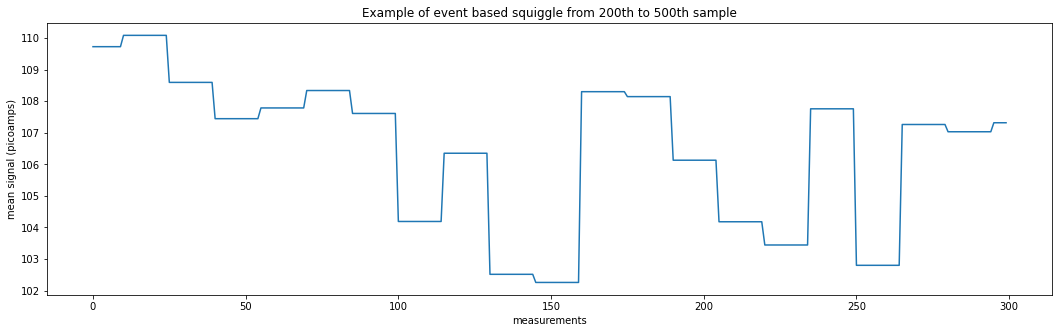

In [59]:
# example of a part of the squiggle
plt.figure(figsize=(18,5))
plt.plot(squiggle[200:500])
plt.title("Example of event based squiggle from 200th to 500th sample")
plt.xlabel("measurements")
plt.ylabel("mean signal (picoamps)")
plt.show()

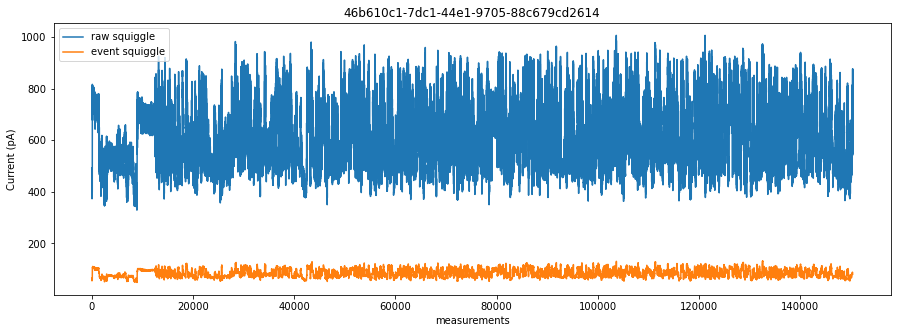

In [60]:
plt.figure(figsize=(15,5))
plt.plot(f5.get_raw_data(), label="raw squiggle")
plt.plot(squiggle, label="event squiggle")
plt.title(f5.get_read_id())
plt.xlabel("measurements")
plt.ylabel("Current (pA)")
plt.legend()
plt.show()

As you can see the raw signal is trasformed and stored as integers into the fast5 in order to save space. <br> 
To transoform them back to raw the formula is the following:

 $ RawUnit = Range / Digitisation $  <br>
 $ Data = (Data + Offset) * RawUnit $

In [61]:
f5.get_raw_data()

array([491, 481, 463, ..., 556, 595, 876], dtype=int16)

In [62]:
# Transforming back to pA scaled raw signals.
raw_unit = f5.get_channel_info()["range"] / f5.get_channel_info()["digitisation"]
pA_signal = (f5.get_raw_data() + f5.get_channel_info()["offset"]) * raw_unit
pA_signal

array([ 68.48986816,  67.10902405,  64.62350464, ...,  77.46535492,
        82.85064697, 121.65236664])

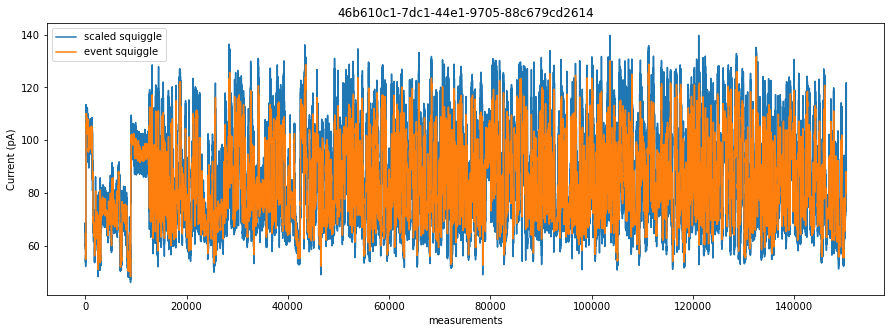

In [63]:
# plotting scaled back to pA signals and events related data
plt.figure(figsize=(15,5))
plt.plot(pA_signal, label="scaled squiggle")
plt.plot(squiggle, label="event squiggle")
plt.title(f5.get_read_id())
plt.xlabel("measurements")
plt.ylabel("Current (pA)")
plt.legend()
plt.show()

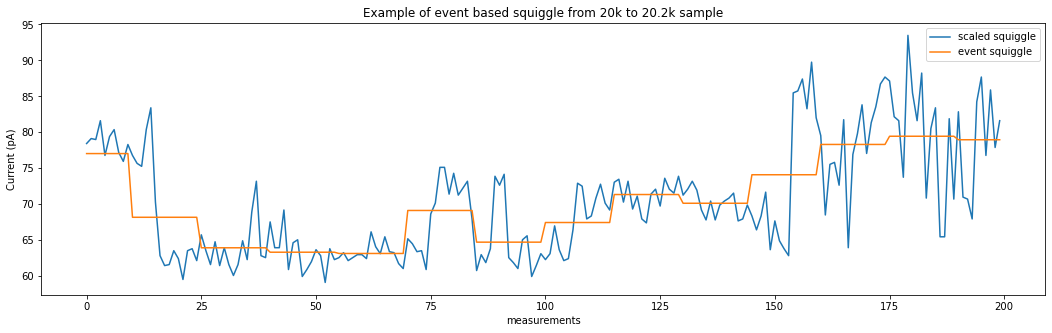

In [64]:
# example of a part of the squiggle of both pA scaled and event related data
plt.figure(figsize=(18,5))
plt.plot(pA_signal[20000:20200], label="scaled squiggle")
plt.plot(squiggle[20000:20200], label="event squiggle")
plt.title("Example of event based squiggle from 20k to 20.2k sample")
plt.xlabel("measurements")
plt.ylabel("Current (pA)")
plt.legend()
plt.show()

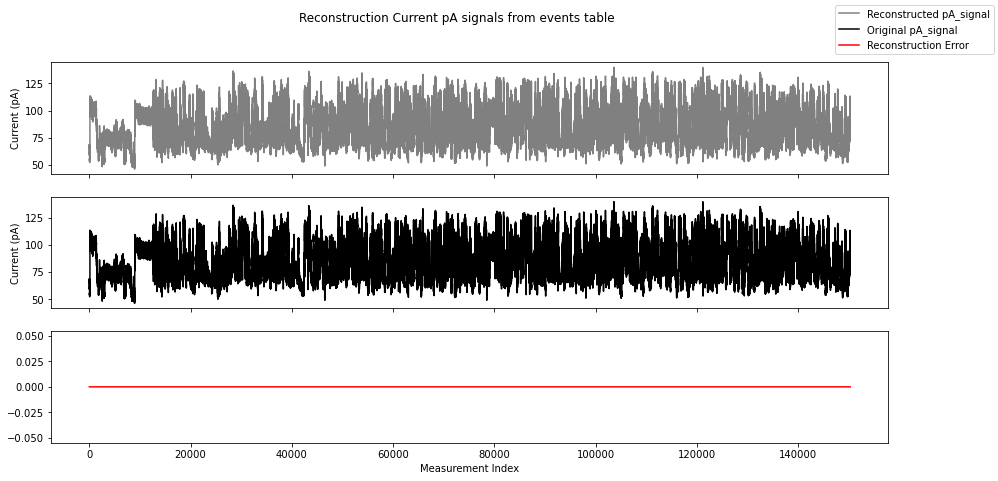

In [93]:
# trying to reconstruct raw pA-converted signal from events (15 mesurementes)
# and concatenating them into a unique sequence.

pA_signal_reconstructed = []
for i in f_events.itertuples():
    pA_signal_reconstructed += list(pA_signal[i.start: i.start+i.length])
reconstruction_error = pA_signal_reconstructed - pA_signal[:len(pA_signal_reconstructed)]

fig, axes = plt.subplots(3,1, figsize=(15,7), sharex=True)
axes[0].plot(pA_signal_reconstructed, label="Reconstructed pA_signal", c="gray")
axes[1].plot(pA_signal[:len(pA_signal_reconstructed)], label="Original pA_signal", c="black")
axes[2].plot(reconstruction_error, label="Reconstruction Error", c="red")
axes[0].set_ylabel("Current (pA)")
axes[1].set_ylabel("Current (pA)")
axes[2].set_xlabel("Measurement Index")
fig.suptitle("Reconstruction Current pA signals from events table")
fig.legend()
plt.show()

There is a perfect match between orginal pA signals and the one reconstructed from the event table index (start and lenght features)

## Analyzing basecalled sequence
Here we will analyze the basecalled sequence stored into the **fastq** dataset of the fast5 file. Furthermore, we will try to reconstruct the fastq sequence by the use of **event** dataset.

In [ ]:
# get fastq related data with ont_fast5_api
f_fastq = f5.get_analysis_dataset("Basecall_1D_000/BaseCalled_template", "Fastq")
print(f_fastq)

In [ ]:
print("Sequence from fastq dataset of fast5 file:\n")
fastq = f_fastq.split("\n")[1]
print(fastq)
print("\nLength: {} {}".format(len(fastq), "bases"))

In [ ]:
# Trying to reconstruct the fastq sequence from the events table.
df = f_events.sort_index(ascending=False).query("move > 0")
sequence = ""
sequence += df.head(1).mp_state.values[0][::-1]
last_move = df.head(1).move.values[0]
for row in df.tail(-1).itertuples():
    '''print(row.Index)
    print(row.move)
    print(row.mp_state)
    print(row.mp_state[0:last_move][::-1])
    print("")'''
    sequence += row.mp_state[0:last_move][::-1]
    last_move = row.move
print(sequence.replace("T", "U"))
print("\nLength: {} bases\n".format(len(sequence)))
print(fastq[:len(sequence)])
print("\nLength: {} bases\n".format(len(fastq)))

In [ ]:
# evaluate if the sequences are identical
sequence == fastq

Something don't work...sequences are not completely equal. We must investigate deeper.

In [ ]:
np.array(list(sequence)) == np.array(list(fastq))

In [ ]:
np.unique((np.array(list(sequence)) == np.array(list(fastq))), return_counts= True)

We have the same length but not the same sequence. We have about 981 mismatches between reconstructed and original fastq sequence. <br>
The problem could be the choise among the model_state or mp_model_state. Probably the algoritmh use, with some criterion, one or the other sequence.

In [ ]:
ix = np.where( np.array(list(sequence)) == np.array(list(fastq)) )[0]
ix

In [ ]:
# Trying to reconstruct the fastq sequence from the events table paying attention 
# on the base called when probability of model_state and mp_state are different.
df = f_events.sort_index(ascending=False).query("move > 0")
sequence = ""
idx_events = []
idxs = []
sequence += df.head(1).mp_state.values[0][::-1]
last_move = df.head(1).move.values[0]
for row in df.tail(-1).itertuples():
    if row.p_model_state == row.p_mp_state:
        sequence += row.mp_state[0:last_move][::-1]
        idx_events.append(row.mp_state[0:last_move][::-1])
        idxs.append(row.Index)
    else:
        sequence += (row.model_state[0:last_move][::-1]).lower()
        idx_events.append( (row.model_state[0:last_move][::-1]).lower() )
        idxs.append(row.Index)
    last_move = row.move
    sequence = sequence.replace("T", "U")
    sequence = sequence.replace("t", "u")
print(sequence)
print("\nLength: {} bases\n".format(len(sequence)))
print(fastq[:len(sequence)])
print("\nLength: {} bases\n".format(len(fastq)))

In [ ]:
np.unique((np.array(list(sequence.upper())) == np.array(list(fastq))), return_counts= True)

Ok! We obtained a very similar sequence. Obviously there are few bases (5 in this case) that doesn't match between orignal fastq and reconstructed fastq sequence. <br>Now let's go with other tryies with other reads from the dataset. <br>
## 2nd attempt:

In [ ]:
url = r"C:\Users\adria\Desktop\EpiNanoDataset\Curlcake_constructs_unmodified_Replicate_1\fast5\1204670-7.fast5\GXB01170_20180726_FAH85615_GA10000_sequencing_run_RNAAB089716_65817_read_306_ch_91_strand.fast5"

f5 = get_fast5_file(url,mode="r")
f5.get_raw_data()

In [ ]:
# get analysis and events related data with ont_fast5_api
f_events = pd.DataFrame(f5.get_analysis_dataset("Basecall_1D_000/BaseCalled_template", "Events"))
f_events

In [ ]:
fastq = f5.get_analysis_dataset("Basecall_1D_000/BaseCalled_template", "Fastq").split("\n")[1]
fastq

In [ ]:
# Trying to reconstruct the fastq sequence from the events table paying attention 
# on the base called when probability of model_state and mp_state are different.
df = f_events.sort_index(ascending=False).query("move > 0")
sequence = ""
idx_events = []
idxs = []
sequence += df.head(1).mp_state.values[0][::-1]
last_move = df.head(1).move.values[0]
for row in df.tail(-1).itertuples():
    if row.p_model_state == row.p_mp_state:
        sequence += row.mp_state[0:last_move][::-1]
        idx_events.append(row.mp_state[0:last_move][::-1])
        idxs.append(row.Index)
    else:
        sequence += (row.model_state[0:last_move][::-1]).lower()
        idx_events.append( (row.model_state[0:last_move][::-1]).lower() )
        idxs.append(row.Index)
    last_move = row.move
    sequence = sequence.replace("T", "U")
    sequence = sequence.replace("t", "u")
print(sequence)
print("\nLength: {} bases\n".format(len(sequence)))
print(fastq[:len(sequence)])
print("\nLength: {} bases\n".format(len(fastq)))

In [ ]:
np.unique((np.array(list(sequence.upper())) == np.array(list(fastq))), return_counts= True)

In [ ]:
sequence.upper() == fastq

In this case we obtained a correct sequence!
### 3rd Attempt:

In [ ]:
url = r"C:\Users\adria\Desktop\EpiNanoDataset\Curlcake_constructs_unmodified_Replicate_1\fast5\1204670-5.fast5\GXB01170_20180726_FAH85615_GA10000_sequencing_run_RNAAB089716_65817_read_10520_ch_131_strand.fast5"

f5 = get_fast5_file(url,mode="r")
f5.get_raw_data()

f_events = pd.DataFrame(f5.get_analysis_dataset("Basecall_1D_000/BaseCalled_template", "Events"))
fastq = f5.get_analysis_dataset("Basecall_1D_000/BaseCalled_template", "Fastq").split("\n")[1]

df = f_events.sort_index(ascending=False).query("move > 0")
sequence = ""
idx_events = []
idxs = []
sequence += df.head(1).mp_state.values[0][::-1]
last_move = df.head(1).move.values[0]
for row in df.tail(-1).itertuples():
    if row.p_model_state == row.p_mp_state:
        sequence += row.mp_state[0:last_move][::-1]
        idx_events.append(row.mp_state[0:last_move][::-1])
        idxs.append(row.Index)
    else:
        sequence += (row.model_state[0:last_move][::-1]).lower()
        idx_events.append( (row.model_state[0:last_move][::-1]).lower() )
        idxs.append(row.Index)
    last_move = row.move
    sequence = sequence.replace("T", "U")
    sequence = sequence.replace("t", "u")
print(sequence)
print("\nLength: {} bases\n".format(len(sequence)))
print(fastq[:len(sequence)])
print("\nLength: {} bases\n".format(len(fastq)))

In [ ]:
np.unique((np.array(list(sequence.upper())) == np.array(list(fastq))), return_counts= True)

In [ ]:
sequence.upper() == fastq

Also in this case we obtained perfectly matching sequences.
## 4th Attempt:

In [ ]:
url = r"C:\Users\adria\Desktop\EpiNanoDataset\Curlcake_constructs_unmodified_Replicate_1\fast5\1204670-4.fast5\GXB01170_20180726_FAH85615_GA10000_sequencing_run_RNAAB089716_65817_read_44356_ch_25_strand.fast5"

f5 = get_fast5_file(url,mode="r")
f5.get_raw_data()

f_events = pd.DataFrame(f5.get_analysis_dataset("Basecall_1D_000/BaseCalled_template", "Events"))
fastq = f5.get_analysis_dataset("Basecall_1D_000/BaseCalled_template", "Fastq").split("\n")[1]

df = f_events.sort_index(ascending=False).query("move > 0")
sequence = ""
idx_events = []
idxs = []
sequence += df.head(1).mp_state.values[0][::-1]
last_move = df.head(1).move.values[0]
for row in df.tail(-1).itertuples():
    if row.p_model_state == row.p_mp_state:
        sequence += row.mp_state[0:last_move][::-1]
        idx_events.append(row.mp_state[0:last_move][::-1])
        idxs.append(row.Index)
    else:
        sequence += (row.model_state[0:last_move][::-1]).lower()
        idx_events.append( (row.model_state[0:last_move][::-1]).lower() )
        idxs.append(row.Index)
    last_move = row.move
    sequence = sequence.replace("T", "U")
    sequence = sequence.replace("t", "u")
print(sequence)
print("\nLength: {} bases\n".format(len(sequence)))
print(fastq[:len(sequence)])
print("\nLength: {} bases\n".format(len(fastq)))

In [ ]:
np.unique((np.array(list(sequence.upper())) == np.array(list(fastq))), return_counts= True)

In [ ]:
sequence.upper() == fastq

Ok also in this case only 2 mismatches. I think this could be to other post-processing steps the MinKNOW software makes. <br>
Now is the right moment to define a superclass of the ont_fast5_api module to automatize these processes I have done above.

## Functions and Classes

In [ ]:
f5

In [ ]:
'''
A Set of functions that can be used on ont_fast5_api.fast5_file.Fast5File objects to extend their functionalities.
'''

def raw_to_pA(f5):
    '''
    Function to transform back from raw signal to pA scale.
    '''
    try:
        raw_unit = f5.get_channel_info()["range"] / f5.get_channel_info()["digitisation"]
        pA_signal = (f5.get_raw_data() + f5.get_channel_info()["offset"]) * raw_unit
        return pA_signal
    except Exception as e:
        print("AN EXCEPTION HAS OCCURRED!\n", e)

def get_events(f5):
    '''
    Function to retrieve eventes related data from fast5 file.
    '''
    try:
        f_events = pd.DataFrame(f5.get_analysis_dataset("Basecall_1D_000/BaseCalled_template", "Events"))
        return f_events
    except Exception as e:
        print("AN EXCEPTION HAS OCCURRED!\n", e)

def get_squiggle(f5):
    '''
    Functions that reconstruct the squiggle from the events table.
    '''
    try:
        squiggle = []
        f_events = get_events(f5)
        for row in f_events.itertuples():
            squiggle += [row.mean for i in range(row.length)]
        return squiggle
    except Exception as e:
        print("AN EXCEPTION HAS OCCURRED!\n", e)

def get_fastq(f5, only_sequence=True):
    '''
    Function to retrieve fastq file related to the fast5 read.
    It is possible to retrieve only the sequence (default setting) or
    to retrieve the whole fastq associated with the quality scores.
    '''
    try:
        fastq = f5.get_analysis_dataset("Basecall_1D_000/BaseCalled_template", "Fastq")
        fastq_sequence = fastq.split("\n")[1]
        if only_sequence == True:
            return fastq_sequence
        elif only_sequence == False:
            return fastq
        else:
            raise Exception("Only True and False values are allowed for 'only_sequence' attribute!")
    except Exception as e:
        print("AN EXCEPTION HAS OCCURRED!\n", e)

def fastq_seq_builder_v1(f5, return_events=False):
    '''
    Function to reconstruct fastq sequence from table of events.
    Version 1: It bases on last elements changed in the context of the model.
    IT MAKES SAME ERRORS! PLEASE USE VESION 2!
    '''
    try:
        f_events = get_events(f5)
        df = f_events.sort_index(ascending=False).query("move > 0")
        sequence = ""
        idx_events = [] # where to store basecalled sequences
        idxs = [] # where to store the index of the f_event table to retrive the corresponding row.
        sequence += df.head(1).mp_state.values[0][::-1]
        last_move = df.head(1).move.values[0]
        for row in df.tail(-1).itertuples():
            if row.p_model_state == row.p_mp_state:
                sequence += row.mp_state[0:last_move][::-1]
                idx_events.append(row.mp_state[0:last_move][::-1])
                idxs.append(row.Index)
            else:
                sequence += (row.model_state[0:last_move][::-1]).lower()
                idx_events.append( (row.model_state[0:last_move][::-1]).lower() )
                idxs.append(row.Index)
            last_move = row.move
            sequence = sequence.replace("T", "U")
            sequence = sequence.replace("t", "u")
        if return_events == True:
            return sequence, (idx_events, idxs)
        elif return_events == False:
            return sequence
        else:
            raise Exception("Only True and False values are allowed for 'only_sequence' attribute!")
    except Exception as e:
        print("AN EXCEPTION HAS OCCURRED!\n", e)

def fastq_seq_builder_v2(f5):
    '''
    Function to reconstruct fastq sequence from table of events.
    Version 2: It bases on the bases probabilities that refers to the base at the center of the context.
    It works pretty good but it can be still improved because of some errors (1 or 2 bases) in 
    the first part of the read. 
    '''
    f_events = get_events(f5)
    df = f_events.query("move > 0")
    sequence = ""
    if df.iloc[0].p_model_state == df.iloc[0].p_mp_state:
        sequence += (df.iloc[0].mp_state)[0:2]
    else:
        sequence += (df.iloc[0].model_state)[0:2]

    for i in df.itertuples():
        mapping_dict = {0:"A", 1:"C", 2:"G", 3:"T"}
        base_probs = np.array([i.p_A, i.p_C, i.p_G, i.p_T])
        if i.p_model_state == i.p_mp_state:
            if i.move == 1:
                sequence += i.mp_state[2]
            elif i.move == 2:
                sequence += i.mp_state[1:3]
        elif i.p_model_state < i.p_mp_state:
            if i.move == 1:
                sequence += i.model_state[2]
            elif i.move == 2:
                sequence += i.model_state[1:3]
        elif i.p_model_state > i.p_mp_state:
            if i.move == 1:
                sequence += i.mp_state[2]
            elif i.move == 2:
                sequence += i.mp_state[1:3]

    if df.iloc[-1].p_model_state == df.iloc[-1].p_mp_state:
        sequence += (df.iloc[-1].mp_state)[-2:]
    else:
        sequence += (df.iloc[-1].model_state)[-2:]

    sequence = sequence.replace("T", "U")
    sequence = sequence[::-1]
    return sequence

def plot_signal(f5, start=None, end=None, plot_squiggle=True, plot_pA_signal=True, 
                base_calls=True, base_calls_text = False, figsize=(20,5)):
    '''
    Function to plot either pA scaled signals and event squiggle.
    '''
    try:
        f5_filename = f5.filename.split("\\")[-1].split(".")[0]
        pA_signal = raw_to_pA(f5)
        squiggle = get_squiggle(f5)
        events = get_events(f5).query("move > 0").start
        events_bases = get_events(f5)
        if start == None:
            start = 0
        if end == None:
            end = len(squiggle)
        plt.figure(figsize=figsize)
        if plot_pA_signal == True:
            plt.plot(np.arange(start, end), pA_signal[start:end], label="Scaled PA Signal", zorder=0)
        if plot_squiggle == True:
            plt.plot(np.arange(start, end), squiggle[start:end], label="Event squiggle", zorder=1)
        if base_calls == True:
            plt.scatter(events[(events > start) & (events < end)],
                        np.array(squiggle)[events[(events > start) & (events < end)]] + np.random.randint(-1,1),
                        color = "black", marker="x", s = 40, label="base-calling", zorder=2)
        if base_calls_text == True:
            plt.ylim(plt.axis()[2]*0.8, plt.axis()[3]*1.5)
            for i in events_bases[(events_bases.start > start) & (events_bases.start +15 < end)].itertuples():
                plt.vlines(i.start, plt.axis()[2], plt.axis()[3], colors="r", linestyles="dotted")
                plt.annotate("Move:"+str(i.move), (i.start + 7.5, plt.axis()[3] * 0.95), ha='center')
                plt.annotate("mp_state:\n"+i.mp_state, (i.start + 7.5, plt.axis()[3] * 0.85), ha='center')
                plt.annotate("model_state:\n"+i.model_state, (i.start + 7.5, plt.axis()[3] * 0.75), ha='center')

        plt.title(f5_filename)
        plt.xlabel("measurements")
        plt.ylabel("Current Signal (pA)")
        plt.legend()
        plt.show()
    except Exception as e:
        print("AN EXCEPTION HAS OCCURRED!\n", e)

In [ ]:
plot_signal(f5, start=24000, end=24200, base_calls_text=True)

In [ ]:
def fastq_seq_builder_v2(f5):
    '''
    Function to reconstruct fastq sequence from table of events.
    Version 2: It bases on the bases probabilities that refers to the base at the center of the model context.
    '''
    f_events = get_events(f5)
    df = f_events.query("move > 0")
    sequence = ""
    if df.iloc[0].p_model_state == df.iloc[0].p_mp_state:
        sequence += (df.iloc[0].mp_state)[0:2]
    else:
        sequence += (df.iloc[0].model_state)[0:2]

    for i in df.itertuples():
        mapping_dict = {0:"A", 1:"C", 2:"G", 3:"T"}
        base_probs = np.array([i.p_A, i.p_C, i.p_G, i.p_T])
        if i.p_model_state == i.p_mp_state:
            if i.move == 1:
                sequence += i.mp_state[2]
            elif i.move == 2:
                sequence += i.mp_state[1:3]
        elif i.p_model_state < i.p_mp_state:
            if i.move == 1:
                sequence += i.model_state[2]
            elif i.move == 2:
                sequence += i.model_state[1:3]
        elif i.p_model_state > i.p_mp_state:
            if i.move == 1:
                sequence += i.mp_state[2]
            elif i.move == 2:
                sequence += i.mp_state[1:3]

    if df.iloc[-1].p_model_state == df.iloc[-1].p_mp_state:
        sequence += (df.iloc[-1].mp_state)[-2:]
    else:
        sequence += (df.iloc[-1].model_state)[-2:]

    sequence = sequence.replace("T", "U")
    sequence = sequence[::-1]
    return sequence

In [ ]:
np.unique((np.array(list(fastq_seq_builder_v2(f5).upper())) == np.array(list(get_fastq(f5)))), return_counts= True)

OOOOOOKAY! As we've seen the vesion 2 of the fastq_seq_builder seems to work nicely without any errors! <br>
Now we can try to validate it on a higher number of read/fast5. the version 1 on the same file makes 2 error on two base called.

In [ ]:
folder_url

In [ ]:
len(os.listdir(folder_url))

In [ ]:
results = []
files = []

with tqdm(total=len(os.listdir(folder_url))) as pbar:
    for i in os.listdir(folder_url):
        total_path = os.path.join(folder_url, i)
        f5 = get_fast5_file(total_path)
        #print(f5.filename)
        '''results.append( 
            np.unique((np.array(list(fastq_seq_builder_v2(f5).upper())) == np.array(list(get_fastq(f5)))), return_counts= True)
        )'''
        if get_fastq(f5) != None:
            results.append(
                np.unique((np.array(list(fastq_seq_builder_v2(f5).upper())) == np.array(list(get_fastq(f5)))), return_counts= True)
            )
            files.append(total_path)
        else:
            print("No fastq file in the fast5 in analysis named\n{}".format(f5.filename))
            print("")
        pbar.update(1)

In [ ]:
results = np.array(results)
results

In [ ]:
results.shape

In [ ]:
len(files)

In [ ]:
boolean = []
for i in results:
    if i[0].shape[0] == 1:
        if i[0][0] == True:
            boolean.append([0, i[1][0]])
        elif i[0][0] == False:
            boolean.append([i[1][0], 0])
    elif i[0].shape[0] == 2:
        boolean.append([i[1][0], i[1][1]])

df_boolean = pd.DataFrame(boolean)
df_boolean.columns = ["False_", "True_"]
df_boolean["Total"] = df_boolean.sum(axis=1)
df_boolean["%_False_"] = 100 * (df_boolean.False_ / df_boolean.Total)
df_boolean["%_True_"] = 100 * (df_boolean.True_ / df_boolean.Total)
print(df_boolean.query("False_ != 0"))
print(df_boolean.query("False_ != 0").shape)

On a total of 7999 fast5 files, 7766 stored a fastq file. Of these 7766, 28 reconstructed sequence where not equal to the fastq given by the machine. We must work on these sequences even if the algoritmh is able to recostruct corretly the major part of the sequences and bases, we can still improve it to resemble the algoritmh of the machinary!

In [ ]:
problematic_files_idx = df_boolean.query("False_ != 0").index.values.tolist()
problematic_files_idx

In [ ]:
files = np.array(files)

In [ ]:
problematic_files = files[problematic_files_idx]
problematic_files.shape

Now I would like to analyse the first file with a problem:

In [ ]:
file_ = problematic_files[0]
print(file_)
print()
f5 = get_fast5_file(file_)
print(f5.filename)
print()
print()
print(">fastq_real")
print(get_fastq(f5))
print()
print(">builder_v2")
print(fastq_seq_builder_v2(f5))
print()
print(">builder_v1")
print(fastq_seq_builder_v1(f5))

Analyzing the sequence with clustal omega I found one mismatch for the version 2 and 3 for the version 1. In particular, the problem is at the beginning of the sequence (i.e. the last event in the event table of the fast5 file). This should be G***U***CAG.... (real fastq of the instrument) while the builder_v2 gave G***G***CAG with a G instead of a U.

In [ ]:
get_events(f5).query("move > 0")

In [ ]:
file_ = problematic_files[1]
print(file_)
print()
f5 = get_fast5_file(file_)
print(f5.filename)
print()
print()
print(">fastq_real")
print(get_fastq(f5))
print()
print(">builder_v2")
print(fastq_seq_builder_v2(f5))
print()
print(">builder_v1")
print(fastq_seq_builder_v1(f5))

In [ ]:
get_events(f5).query("move > 0")

In [ ]:
file_ = problematic_files[5]
print(file_)
print()
f5 = get_fast5_file(file_)
print(f5.filename)
print()
print()
print(">fastq_real")
print(get_fastq(f5))
print()
print(">builder_v2")
print(fastq_seq_builder_v2(f5))
print()
print(">builder_v1")
print(fastq_seq_builder_v1(f5))

In [ ]:
get_events(f5).query("move > 0")

In [ ]:
file_ = problematic_files[13]
print(file_)
print()
f5 = get_fast5_file(file_)
print(f5.filename)
print()
print()
print(">fastq_real")
print(get_fastq(f5))
print()
print(">builder_v2")
print(fastq_seq_builder_v2(f5))
print()
print(">builder_v1")
print(fastq_seq_builder_v1(f5))

In [ ]:
get_events(f5).query("move > 0")